In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def rule3(Aun, Bun):
    Qun = np.sqrt(Aun**2 + Bun**2)
    return Qun

def rule4(Q, Ae, Be, Aun, Bun, A, B):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2))
    return Qun

def brute (A, Aun):
    Ohms_un = np.abs(totohms(np.average(A)) - totohms(np.average(A) + Aun))
    return Ohms_un

def resist (V, i):
    R = (V/i)
    return R

def totohms (o):
    ototal = (np.sum(o**-1))**-1
    return ototal


In [39]:
#Measurements

V1 = .248 ; A1 = 0.003
V2 = .496 ; A2 = 0.006
V3 = 0.996 ; A3 = 0.012
V4 = 2.002 ; A4 = 0.0025
V5 = 3.005 ; A5 = 0.037
V6 = 4.004 ; A6 = 0.049
V7 = 4.999 ; A7 = 0.062
V8 = 6.003 ; A8 = 0.075
V9 = 7.00 ; A9 = 0.087
V10 = 8.00 ; A10 = 0.099
V11 = 9.00 ; A11 = 0.112
V12 = 10.00 ; A12 = .125

#Series
vtotal = 4.998
v24s = .977
v100s = 4.006
atops = 0.041
abots = 0.041
vtots = v24s + v100s
amps = .5*(atops + abots) #amperage top of circuit and bottom of circuit

#parallel
vtotalp = 4.985
v24p = 4.826
v100p = 4.828
ampl = .206
ampr = 0.050

#uncertainties
v_un = .01
a_un = .001
o_un = 0.05

#ohms
Oactual = 81.2
o24 = 23.8
o100 = 97.9

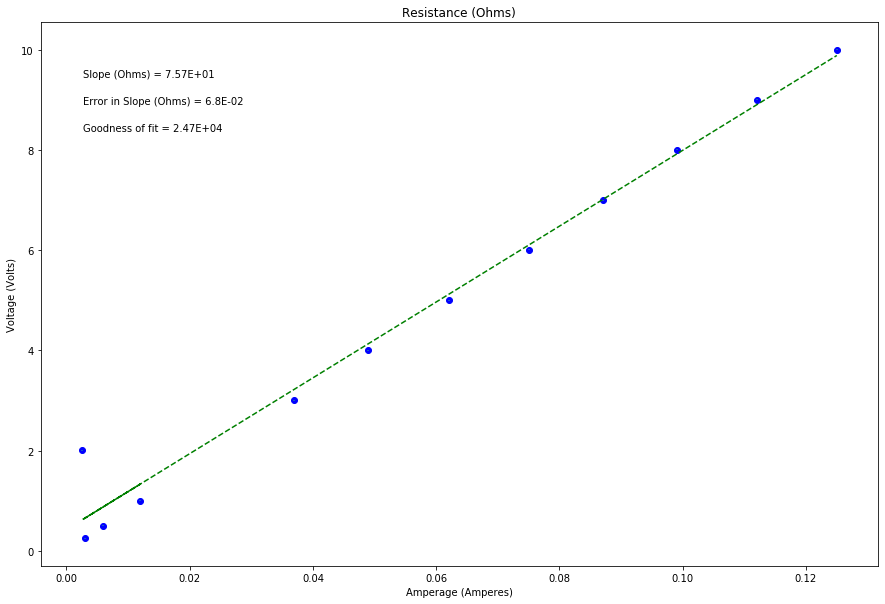

The calculated value for resistance was 75.7 +/- 0.1 ohms. The measured value was 81.2 ohms.


In [35]:
V_array = np.array ([V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12])
A_array = np.array ([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12])

x = A_array   #this should be the array you want to plot on the x axis
y = V_array
dy = np.array([v_un]*12)  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Amperage (Amperes)')
plt.ylabel('Voltage (Volts)')
plt.title('Resistance (Ohms)')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (Ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

print('The calculated value for resistance was', '%.1f' % m, '+/-', '%.1f' % dm,'ohms. The measured value was', Oactual,'ohms.')


In [55]:
#part 2
#measured
ototals = (o24+o100)
ototals_un = rule3(o_un, o_un)
o24
o100

#calculated
otots = resist(vtotal, amps)
otots_un = rule4(otots, 1, -1, v_un, a_un, vtotal, amps)
r1 = resist(v24s, atops)
r1_un = rule4(r1, 1, -1, v_un, a_un, v24s, atops)
r2 = resist(v100s, abots)
r2_un = rule4(r2, 1, -1, v_un, a_un, v100s, abots)

print('The measured value for series of resistance was:', '%.1f +/- %.1f ohms.' % (ototals, ototals_un))
print('The calculated value was for series of resistance total was: %.1f +/- %.1f ohms.' % (otots, otots_un))
print()
print('The measured value for R1 was: ', o24, '+/-', o_un,'ohms. With a calculated value  of %.1f +/- %.2f' % (r1, r1_un))
print('The measured value for R2 was: ', o100, '+/-', o_un,'ohms. With a calculated value  of %.1f +/- %.2f' % (r2, r2_un))



The measured value for series of resistance was: 121.7 +/- 0.1 ohms.
The calculated value was for series of resistance total was: 121.9 +/- 3.0 ohms.

The measured value for R1 was:  23.8 +/- 0.05 ohms. With a calculated value  of 23.8 +/- 0.63
The measured value for R2 was:  97.9 +/- 0.05 ohms. With a calculated value  of 97.7 +/- 2.40


In [58]:
# parallel

#measured
OtotM = totohms(np.array([o24, o100]))
OtotM_un = brute(np.array([o24, o100]), o_un)
print('The measured value for total resistance in parllel was %.2f +/- %.2f ohms.' % (OtotM, OtotM_un))

r1p = resist(v24p, ampl)
r2p = resist(v100p, ampr)
r1p_un = rule4(r1p, 1, -1, v_un, a_un, v24p, ampl)
r2p_un = rule4(r2p, 1, -1, v_un, a_un, v100p, ampr)

OtotPCalc = totohms(np.array([r1p, r2p]))
OtotPCalc_un = brute(np.array([r1p, r2p]), np.average(np.array([r1p_un, r2p_un])))

print('The calculated value for parallel resistance was %.1f +/- %.1f ohms' % (OtotPCalc, OtotPCalc_un))
print()
print('The measured value for R1 was: ', o24, '+/-', o_un,'ohms. With a calculated value  of %.1f +/- %.2f' % (r1p, r1p_un))
print('The measured value for R2 was: ', o100, '+/-', o_un,'ohms. With a calculated value  of %.1f +/- %.2f' % (r2p, r2p_un))

The measured value for total resistance in parllel was 19.15 +/- 0.05 ohms.
The calculated value for parallel resistance was 18.9 +/- 1.0 ohms

The measured value for R1 was:  23.8 +/- 0.05 ohms. With a calculated value  of 23.4 +/- 0.12
The measured value for R2 was:  97.9 +/- 0.05 ohms. With a calculated value  of 96.6 +/- 1.94
